In [1]:
import argparse

import numpy as np

import datasets
datasets.disable_caching()
import torch

from attack_utils.wanet import WanetTriggerHandler
from utils.data import DataModule
from utils import set_seed, add_comm_arguments
import torch.nn.functional as F

import matplotlib.pyplot as plt

In [2]:
def create_parser():
    parser = argparse.ArgumentParser(description="Argument parser for the script")
    add_comm_arguments(parser)
    # Poisoning paramerters
    # parser.add_argument('--trigger_identity_grid', type=float, default=40, help='Size of the trigger')
    # parser.add_argument('--trigger_noise_grid', type=float, default=6, help='Size of the trigger')
    parser.add_argument("--trigger_s", type=float, default=0.5)
    parser.add_argument("--trigger_k", type=int, default=4)
    parser.add_argument(
        "--trigger_grid_rescale", type=float, default=1
    )  # scale grid values to avoid pixel values going out of [-1, 1]. For example, grid-rescale = 0.98
    return parser


args = create_parser().parse_args("--trainset_portion 1.0 --epochs 100 --poisoning_rate 0.01 --model_name resnet18 --lr 0.1 --optimizer_name sgd --device cuda:4".split())
dm = DataModule(args)

set_seed(args.seed)
# We shuffle the training set
train_shuffle_ids = np.random.permutation(dm.hparams.trainset_orig_size).tolist()
triggle_handler = WanetTriggerHandler(
    args.trigger_label,
    dm.hparams.image_shape, 
    args.trigger_k,
    s=args.trigger_s, grid_rescale=args.trigger_grid_rescale,
    noise=False)
dm.setup_trigger(train_shuffle_ids, triggle_handler)

Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

/home/ubuntu/miniconda3/envs/datalab/lib/python3.11/site-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /opt/conda/conda-bld/pytorch_1708025845868/work/aten/src/ATen/native/TensorShape.cpp:3549.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/home/ubuntu/miniconda3/envs/datalab/lib/python3.11/site-packages/torch/nn/functional.py:3782: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


Filter:   0%|          | 0/50000 [00:00<?, ? examples/s]

Trainset size: 50000
[('airplane', 5000), ('automobile', 5000), ('bird', 5000), ('cat', 5000), ('deer', 5000), ('dog', 5000), ('frog', 5000), ('horse', 5000), ('ship', 5000), ('truck', 5000)]
Poison_size 500


Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

Poisoned Trainset
[('airplane', 5457), ('automobile', 4941), ('bird', 4933), ('cat', 4949), ('deer', 4949), ('dog', 4948), ('frog', 4951), ('horse', 4960), ('ship', 4963), ('truck', 4949)]


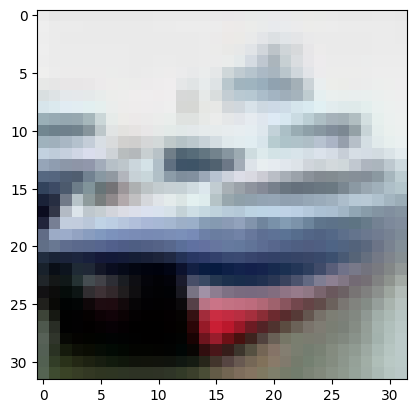

In [3]:
plt.imshow(dm.base_ds['test_poisoned'][1]['img'])

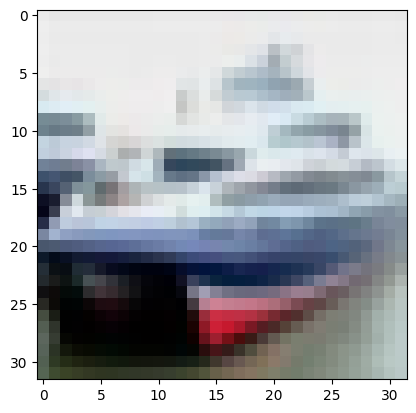

In [4]:
plt.imshow(dm.base_ds['test'][1]['img'])

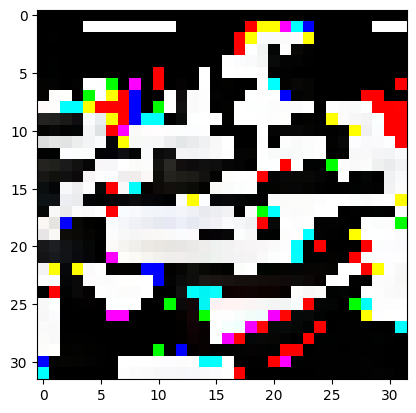

In [5]:
plt.imshow(np.array(dm.base_ds['test_poisoned'][1]['img']) - np.array(dm.base_ds['test'][1]['img']))

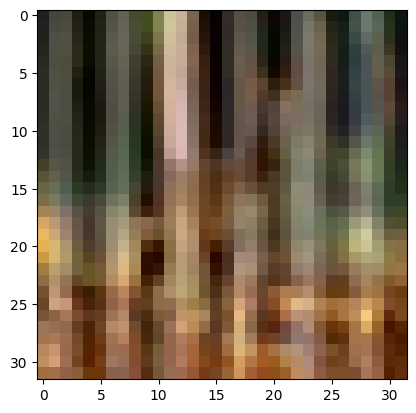

In [18]:
plt.imshow(dm.base_ds['train_poisoned'][8]['img'])